# Analyzing IMDB Data in Keras

In [12]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

## 1. Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

In [33]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [34]:
print(x_train[0])
print(y_train[0])

[1, 61, 362, 2, 645, 149, 4, 2, 7, 14, 123, 199, 4, 402, 672, 23, 4, 2, 5, 4, 303, 663, 23, 2, 223, 5, 36, 119, 12, 13, 286, 2, 4, 123, 69, 60, 2, 501, 4, 86, 42, 333, 811, 146, 2, 17, 8, 51, 2, 32, 7, 4, 177, 2, 207, 110, 98, 2, 17, 545, 2, 5, 246, 6, 320, 634, 2, 2, 23, 4, 2, 28, 2, 164, 21, 2, 795, 23, 89, 4, 402, 672, 71, 38, 76, 128, 74, 4, 303, 672, 2, 13, 92, 67, 6, 226, 176, 7, 2, 4, 2, 5, 2, 2, 2, 4, 172, 469, 21, 36, 81, 2, 49, 87, 84, 367, 4, 96, 61, 577, 47, 276, 4, 2, 23, 41, 657, 2, 38, 382, 4, 2, 7, 318, 944, 5, 2, 80, 2, 49, 641, 23, 32, 7, 14, 13, 82, 657, 2, 224, 49, 532, 2, 486, 44, 4, 2, 40, 23, 430, 892, 182, 121, 36, 2, 4, 117, 799, 18, 35, 436, 811, 42, 38, 5, 54, 6, 275, 284, 303, 287, 56, 395, 41, 36, 942, 41, 121, 442, 77, 5, 59, 560, 2, 42, 54, 402, 201, 2, 2, 2, 287, 56, 18, 4, 312, 396, 2, 36, 942, 90, 121, 240, 77, 5, 29, 560, 120, 50, 2, 8, 4, 173, 7, 4, 2, 115, 617, 34, 4, 370, 159, 660, 2, 443, 2, 858, 56, 5, 620, 125, 268, 443, 2, 112, 160, 109, 37, 31

## 3. One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

In [35]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train.shape)
print(x_test.shape)

(25000, 1000)
(25000, 1000)


And we'll also one-hot encode the output.

In [36]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


## 4. Building the  model architecture
Build a model here using sequential. Feel free to experiment with different layers and sizes! Also, experiment adding dropout to reduce overfitting.

In [60]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from IPython.display import clear_output

# TODO: Build the model architecture
model = Sequential()
model.add(Dense(500, activation='relu', input_shape=(1000,)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# TODO: Compile the model using a loss function and an optimizer.
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# TODO : Testing only
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_10 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 1002      
Total params: 501,502
Trainable params: 501,502
Non-trainable params: 0
_________________________________________________________________


## 5. Training the model
Run the model here. Experiment with different batch_size, and number of epochs!

In [54]:
# TODO: Run the model. Feel free to experiment with different batch sizes and number of epochs.
print ("Training started")
model.fit(x_train, y_train, epochs=30, batch_size=512, verbose=2)
print ("Training completed")

Training started
Epoch 1/30
 - 1s - loss: 0.0075 - acc: 0.9985
Epoch 2/30
 - 1s - loss: 0.0054 - acc: 0.9991
Epoch 3/30
 - 1s - loss: 0.0055 - acc: 0.9988
Epoch 4/30
 - 1s - loss: 0.0052 - acc: 0.9992
Epoch 5/30
 - 1s - loss: 0.0044 - acc: 0.9993
Epoch 6/30
 - 1s - loss: 0.0041 - acc: 0.9993
Epoch 7/30
 - 1s - loss: 0.0036 - acc: 0.9996
Epoch 8/30
 - 1s - loss: 0.0039 - acc: 0.9993
Epoch 9/30
 - 1s - loss: 0.0033 - acc: 0.9996
Epoch 10/30
 - 1s - loss: 0.0029 - acc: 0.9997
Epoch 11/30
 - 1s - loss: 0.0031 - acc: 0.9996
Epoch 12/30
 - 1s - loss: 0.0030 - acc: 0.9996
Epoch 13/30
 - 1s - loss: 0.0026 - acc: 0.9997
Epoch 14/30
 - 1s - loss: 0.0029 - acc: 0.9997
Epoch 15/30
 - 1s - loss: 0.0029 - acc: 0.9996
Epoch 16/30
 - 1s - loss: 0.0025 - acc: 0.9997
Epoch 17/30
 - 1s - loss: 0.0022 - acc: 0.9998
Epoch 18/30
 - 1s - loss: 0.0028 - acc: 0.9997
Epoch 19/30
 - 1s - loss: 0.0026 - acc: 0.9996
Epoch 20/30
 - 1s - loss: 0.0025 - acc: 0.9997
Epoch 21/30
 - 1s - loss: 0.0024 - acc: 0.9997
Epoch

In [58]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

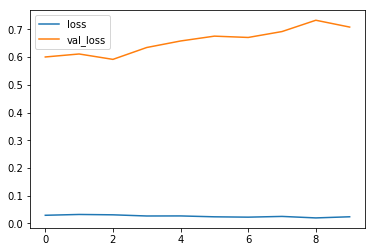

 - 7s - loss: 0.0234 - acc: 0.9922 - val_loss: 0.7086 - val_acc: 0.8539


In [63]:
hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test), 
          callbacks=[plot_losses],
          verbose=2)
# https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

## 6. Evaluating the model
This will give you the accuracy of the model, as evaluated on the testing set. Can you get something over 85%?

In [55]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: ", score[1])

('Accuracy: ', 0.86007999999999996)
